In [1]:
from keras.applications.resnet50 import ResNet50
# from keras.applications.mobilenet import MobileNet
# from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

import os

os.environ["CUDA_VISIBLE_DEVICES"] = "1,2,3"
model = ResNet50(weights='imagenet')
# model = MobileNet(weights='imagenet')
# model = Xception(weights='imagenet')

img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(x.shape)
print(type(x))
print(x.dtype)

preds = model.predict(x)
print(preds.shape)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
print(decode_predictions(preds, top=1)[0][0][2])

Using TensorFlow backend.
/home/aaronpang/anaconda3/envs/obj/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


(1, 224, 224, 3)
<class 'numpy.ndarray'>
float32
(1, 1000)
Predicted: [('n02504458', 'African_elephant', 0.50471187), ('n01871265', 'tusker', 0.2964556), ('n02504013', 'Indian_elephant', 0.1927536)]
0.50471187


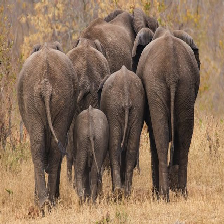

In [2]:
img

In [2]:

import keras
keras.__version__

'2.1.5'

In [4]:
!nvidia-smi

Wed Mar 21 01:36:48 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.90                 Driver Version: 384.90                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 00000000:05:00.0 Off |                  N/A |
| 54%   76C    P2   165W / 180W |   7917MiB /  8112MiB |     99%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 1080    Off  | 00000000:06:00.0 Off |                  N/A |
| 24%   49C    P2    42W / 180W |   7894MiB /  8114MiB |     15%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [4]:
import numpy as np

import cv2

In [6]:
x = np.zeros((224, 224, 3))

In [8]:
cv2.resize(x, (150, 150)).shape

(150, 150, 3)

In [4]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras import backend as K
import cv2, numpy as np
import math
import numpy, scipy
from scipy import interpolate
import scipy.ndimage
import time
from keras.applications.vgg16 import VGG16
K.set_image_dim_ordering('th')

def vgg_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1, 1), input_shape=(3, 224, 224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))
    
    return model

In [7]:
test = vgg_16()

/home/aaronpang/anaconda3/envs/obj/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/home/aaronpang/anaconda3/envs/obj/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/home/aaronpang/anaconda3/envs/obj/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
/home/aaronpang/anaconda3/envs/obj/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
/home/aaronpang/anaconda3/envs/obj/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/home/aaronpang/anaconda3/envs/obj/lib/python3.6/site-pac

In [8]:
test.layers

In [20]:
print(len(test.layers))
print(test.layers[31])
print(test.layers[-6])
print(test.layers[33])
print(test.layers[23])

37


In [5]:
vgg = VGG16(include_top=True, weights='imagenet')

/home/aaronpang/anaconda3/envs/obj/lib/python3.6/site-packages/keras/applications/vgg16.py:188: UserWarning: You are using the TensorFlow backend, yet you are using the Theano image data format convention (`image_data_format="channels_first"`). For best performance, set `image_data_format="channels_last"` in your Keras config at ~/.keras/keras.json.
  warnings.warn('You are using the TensorFlow backend, yet you '


In [15]:
vgg.layers

In [22]:
print(len(vgg.layers))

print(vgg.layers[19])
print(vgg.layers[20])
print(vgg.layers[14])


23


In [ ]:
0x7ff428089208